In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("student-mat.csv",sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Task 1: Data Preprocessing: Loading, Cleaning & Exploration

In [18]:
#Doing a statistical analysis on the dataset
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [19]:
#Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [20]:
#Checking for any null values in the dataset:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

From the above code, we have seen that there are no null values in the dataset, hence the dataset is a clean one

In [21]:
#Checking for any duplicates in the dataset
df.duplicated().sum()

0

From the above dataset, there are no duplicates.

In [22]:
# Find categorical features
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [23]:
#Encoding categorical variables:
df = pd.get_dummies(df,columns=categorical_columns, drop_first = True)
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,False,True,False,True,True,False,True,True,False,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,False,True,False,False,False,False,False,True,False,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,False,False,False,False,False,True,True,False


Encoding categorical variables is essential in data preprocessing because it helps machine learning algorithms to handle non-numeric data directly. This helps in preserving information and avoiding errors during training.

Task 2: Feature Selection/Engineering & Data Splitting

Feature selection refers to the process of choosing the most relevant input variables from the dataset that contribute the most to the prediction of the target variable. This will include dropping the noise (random or irrelevant data that can obscure the underlying patterns)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Computing the correlation between other variables, with the target variable G3
correlation_matrix = df.corr()
correlation_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,...,-0.133558,0.398396,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,...,0.112375,-0.118635,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,...,-0.047265,-0.091250,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,...,-0.057669,0.048758,-0.009246,-0.003286,-0.066420,-0.007766,-0.033338,-0.083508,-0.111302,0.021962
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,...,-0.024031,0.031724,0.037763,0.145228,0.167220,0.089877,0.081325,0.175081,0.059422,0.053285
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,...,-0.134498,0.291157,-0.000437,-0.055075,-0.188039,-0.069341,-0.100734,-0.300316,-0.063451,0.093137
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,...,-0.010983,0.049548,-0.001345,-0.020436,0.000460,0.040687,-0.003581,0.024319,0.032768,-0.063816
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,...,-0.028979,0.069438,-0.045465,0.010538,-0.064253,0.089728,-0.024696,-0.061244,0.051286,-0.011182
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,...,0.080236,-0.012380,-0.037698,-0.015631,0.010493,0.046088,0.004612,-0.039700,0.074370,0.007870
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,...,-0.051224,0.037626,-0.021485,-0.031575,0.062465,-0.066508,-0.084849,-0.069828,0.036210,0.015121


In [28]:
#Showing correlation with the target variable G3
correlation_with_g3 = correlation_matrix['G3'].sort_values(ascending = False)
print(correlation_with_g3)

G3                   1.000000
G2                   0.904868
G1                   0.801468
Medu                 0.217147
higher_yes           0.182465
Fedu                 0.152457
Mjob_health          0.116158
address_U            0.105756
sex_M                0.103456
paid_yes             0.101996
internet_yes         0.098483
studytime            0.097820
reason_reputation    0.095692
Fjob_teacher         0.095374
famsize_LE3          0.081407
Mjob_services        0.078429
Mjob_teacher         0.057712
Fjob_health          0.057111
reason_other         0.052008
nursery_yes          0.051568
famrel               0.051363
absences             0.034247
guardian_mother      0.022338
activities_yes       0.016100
freetime             0.011307
Fjob_services       -0.016108
reason_home         -0.021359
famsup_yes          -0.039157
school_MS           -0.045017
Walc                -0.051939
Fjob_other          -0.053483
Dalc                -0.054660
Pstatus_T           -0.058009
health    

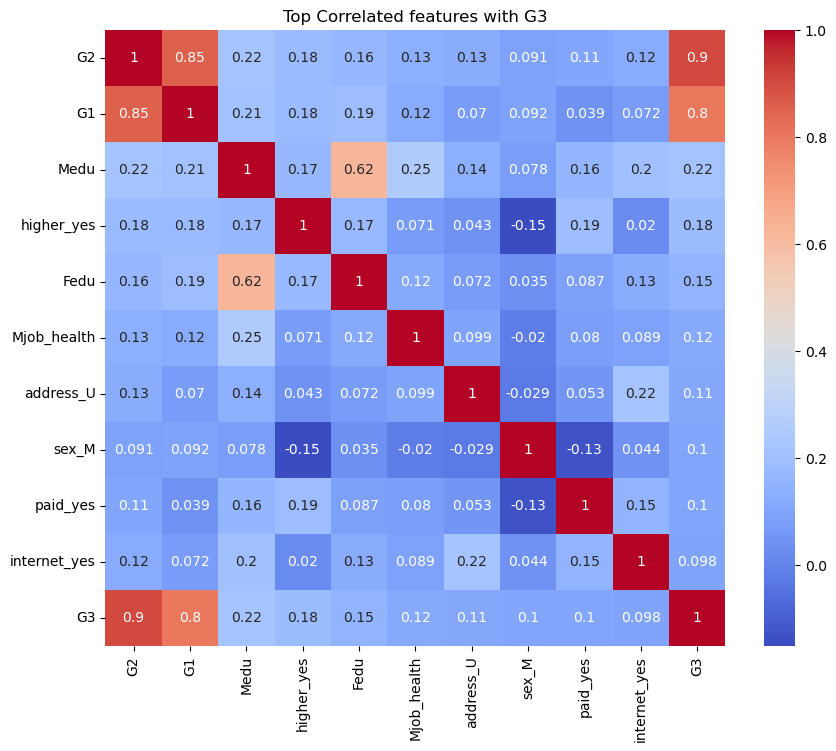

In [29]:
#Plotting a heatmap of top correlated features
top_corr_features = correlation_with_g3[1:11].index
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded[top_corr_features.tolist() + ['G3']].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated features with G3')
plt.show()

In [30]:
df['Pass']= df['G3'].apply(lambda x: 1 if x >=10 else 0)

In [31]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Pass
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,True,True,False,False,0
1,17,1,1,1,2,0,5,3,3,1,...,False,False,True,False,False,False,True,True,False,0
2,15,1,1,1,2,3,4,3,2,2,...,False,True,False,True,False,True,True,True,False,1
3,15,4,2,1,3,0,3,2,2,1,...,False,False,True,True,True,True,True,True,True,1
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,True,False,True,True,False,False,1


In [32]:
df.drop(columns='G3', inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  school_MS          395 non-null    bool 
 16  sex_M              395 non-null    bool 
 17  address_U       

In [35]:
cols_convert=['G2', 'G1', 'Medu', 'Fedu', 'traveltime', 'goout', 'age', 'failures']
df[cols_convert]=df[cols_convert].astype(bool)

In [37]:
#Splitting the data
features=df[['G2', 'G1', 'Medu', 'Fedu', 'traveltime', 'goout', 'age', 'failures']]
X = features
y = df['Pass']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Task 3: Training the model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

#Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred1 = lr_model.predict(X_test)

In [48]:
y_pred1

array([ 0.4457287 ,  0.7699298 ,  0.4457287 ,  0.7699298 ,  0.4457287 ,
        0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,
        0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,
        0.7699298 ,  0.7699298 ,  0.7699298 ,  0.66210055,  0.7699298 ,
        0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,
        0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,  1.        ,
        0.4457287 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,
        0.4457287 , -0.21613407,  0.7699298 ,  0.7699298 ,  0.4457287 ,
        0.4457287 ,  0.7699298 ,  0.7699298 ,  0.4457287 ,  0.7699298 ,
        0.7699298 ,  0.7699298 ,  0.4457287 ,  0.7699298 ,  0.7699298 ,
        0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,
        0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,  0.7699298 ,
        0.7699298 ,  0.7699298 ,  0.4457287 ,  0.7699298 ,  0.4457287 ,
        0.7699298 ,  0.4457287 ,  0.7699298 ,  0.7699298 ,  0.76

In [39]:
#Model 2: Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [49]:
y_pred2 = y_pred = tree_model.predict(X_test)

In [50]:
y_pred2

array([0.4375   , 0.7721519, 0.4375   , 0.7721519, 0.4375   , 0.7721519,
       0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519,
       0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519,
       1.       , 0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519,
       0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519, 1.       ,
       0.4375   , 0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.4375   ,
       0.       , 0.7721519, 0.7721519, 0.4375   , 0.4375   , 0.7721519,
       0.7721519, 0.4375   , 0.7721519, 0.7721519, 0.7721519, 0.4375   ,
       0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519,
       0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519,
       0.7721519, 0.7721519, 0.4375   , 0.7721519, 0.4375   , 0.7721519,
       0.4375   , 0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519,
       0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519, 0.7721519,
       0.4375   ])

In [51]:
#Model 3: Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

Task 4: Evaluating models

In [53]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

print("Accuracy3:", accuracy_score(y_test, y_pred3))

Accuracy3: 0.759493670886076


In [42]:
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Detailed Report:", classification_report(y_test, y_pred))

F1 Score: 0.8376068376068376


In [43]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Confusion Matrix: [[11 16]
 [ 3 49]]


In [44]:
print("Detailed Report:", classification_report(y_test, y_pred))

Detailed Report:               precision    recall  f1-score   support

           0       0.79      0.41      0.54        27
           1       0.75      0.94      0.84        52

    accuracy                           0.76        79
   macro avg       0.77      0.67      0.69        79
weighted avg       0.76      0.76      0.73        79

